# Convolution of discrete functions

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

Running Python: 3.12.4
Running Sympy: 1.13.2


##  Example 6

In [2]:
def Ud(n): # discrete heaviside
    u = n*0
    u[n >= 0] = 1
    return u

In [3]:
# discrete indices
n = np.arange(-10,10)
k = n

# define the 2 functions to convolve
g = Ud(n)
w = 2.0**n*Ud(-n)

# compute the discrete convolution
y = []
for nn in n:
    y = np.append(y,np.sum(w*Ud(nn-k)))

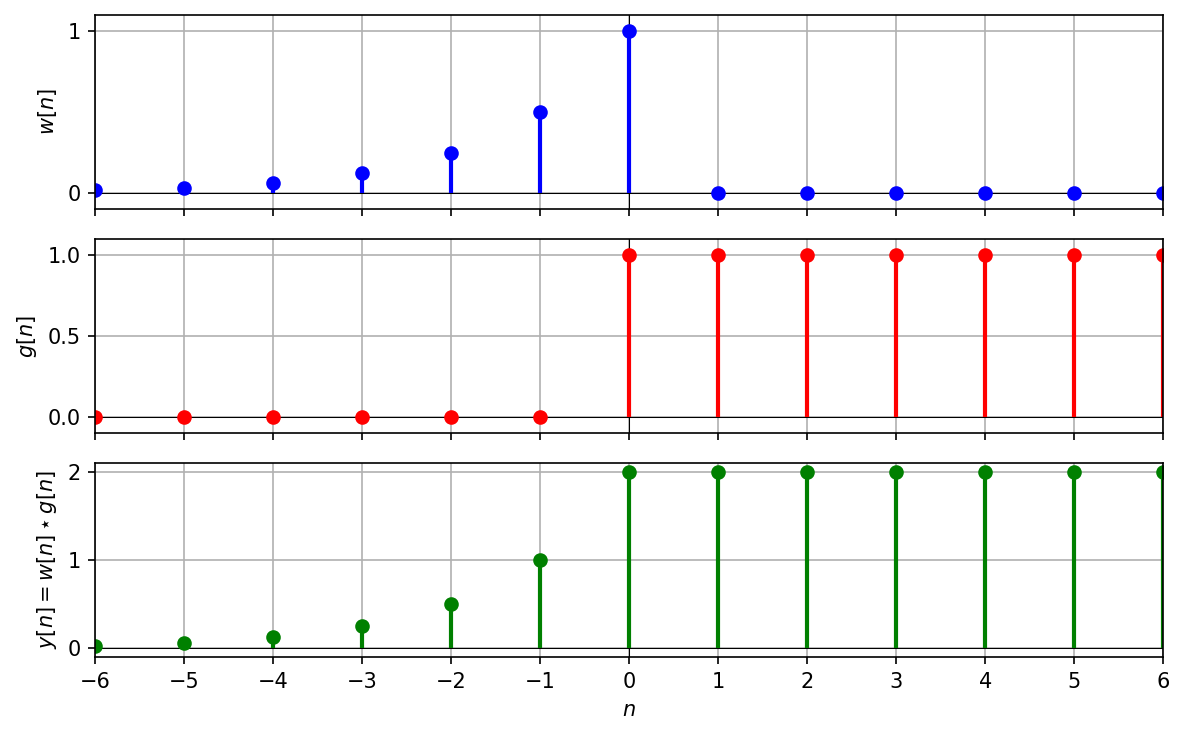

In [4]:
fig = plt.figure(figsize=(8, 5),dpi=150)
ax1 = fig.add_subplot(311)
ax1.plot([k[0]-1, k[-1]+1],[0,0],'k-',lw=0.5)
ax1.plot([0,0],[-2, 2],'k-',lw=0.5)
ax2 = fig.add_subplot(312, sharex=ax1)
ax2.plot([k[0]-1, k[-1]+1],[0,0],'k-',lw=0.5)
ax2.plot([0,0],[-2, 2],'k-',lw=0.5)
ax3 = fig.add_subplot(313, sharex=ax1)
ax3.plot([k[0]-1, k[-1]+1],[0,0],'k-',lw=0.5)
ax3.plot([0,0],[-2, 2],'k-',lw=0.5)

major_ticks = k    
ax1.set_xticks(major_ticks)
ax1.set_yticks(np.arange(0,2))
ax1.grid(True)

markerline, stemlines, baseline = ax1.stem(k, w,linefmt='b',markerfmt='bo')
plt.setp(baseline, visible=False)
markerline, stemlines, baseline = ax2.stem(k, g,linefmt='r',markerfmt='ro',label='$a = $')
plt.setp(baseline, visible=False)
markerline, stemlines, baseline = ax3.stem(k, y,linefmt='g',markerfmt='go',label='$a = $')
plt.setp(baseline, visible=False)

ax1.set_xlim([-6, 6])
ax1.set_ylim([-0.1, 1.1])
ax2.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 2.1])
ax1.set_ylabel('$w[n]$')
ax2.set_ylabel('$g[n]$')
ax3.set_ylabel('$y[n]=w[n]\star g[n]$')
ax3.set_xlabel('$n$')

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
savefig('figs/Topic5_ex6.png',dpi=300)
plt.show()

##  Example 7

In [5]:
n = np.arange(-4,10)
k = n

def g(nn):
    g = 0*n
    try:
        g[np.argwhere(nn==-2).item()] = -2
    except:
        pass
    try:
        g[np.argwhere(nn==-1).item()] = 4
    except:
        pass
    try:
        g[np.argwhere(nn==0).item()] = 2
    except:
        pass
    try:
        g[np.argwhere(nn==2).item()] = -3
    except:
        pass
    try:
        g[np.argwhere(nn==4).item()] = 3
    except:
        pass
    try:
        g[np.argwhere(nn==5).item()] = 1
    except:
        pass
    return g

def w(nn):
    w = 0*n
    w[np.argwhere(nn==-1).item()] = -2
    w[np.argwhere(nn==0).item()] = 3
    return w

y = []
for nn in n:
    y = np.append(y,np.sum(w(k)*g(nn-k)))

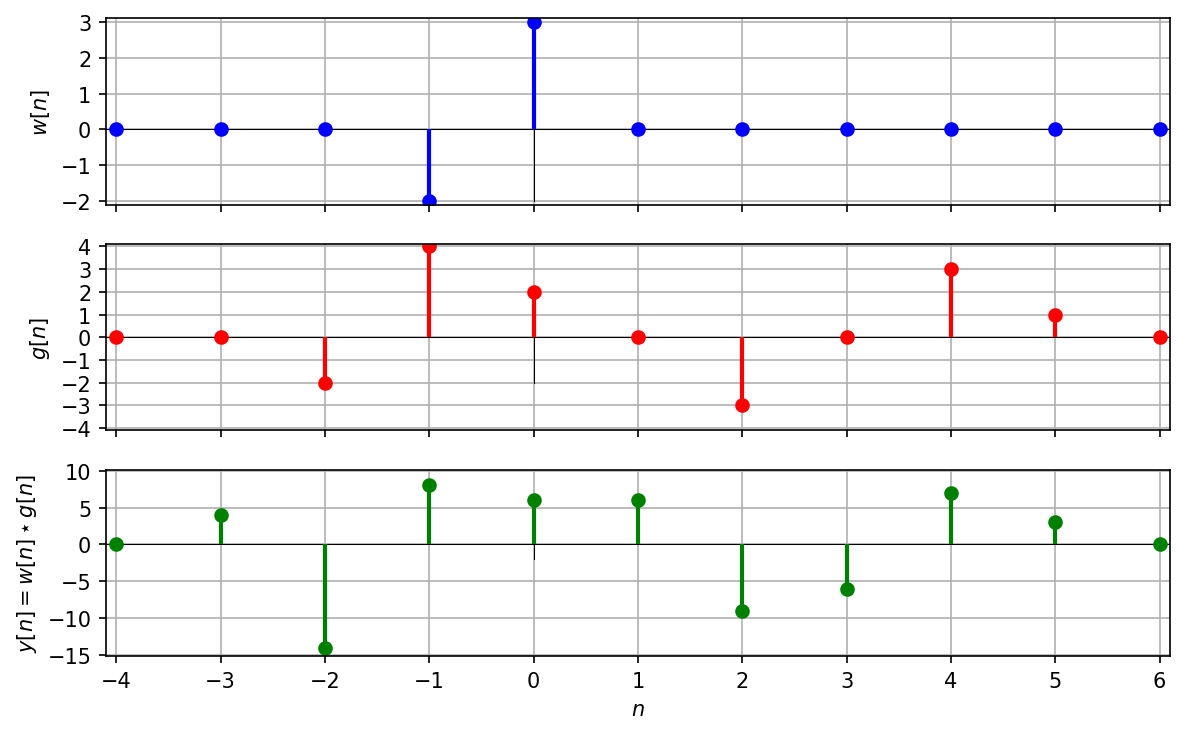

In [6]:
fig = plt.figure(figsize=(8, 5),dpi=150)
ax1 = fig.add_subplot(311)
ax1.plot([k[0]-1, k[-1]+1],[0,0],'k-',lw=0.5)
ax1.plot([0,0],[-2, 2],'k-',lw=0.5)
ax2 = fig.add_subplot(312, sharex=ax1)
ax2.plot([k[0]-1, k[-1]+1],[0,0],'k-',lw=0.5)
ax2.plot([0,0],[-2, 2],'k-',lw=0.5)
ax3 = fig.add_subplot(313, sharex=ax1)
ax3.plot([k[0]-1, k[-1]+1],[0,0],'k-',lw=0.5)
ax3.plot([0,0],[-2, 2],'k-',lw=0.5)

major_ticks = k    
ax1.set_xticks(major_ticks)
ax1.set_yticks(np.arange(-15,15))
ax2.set_yticks(np.arange(-15,15))
ax3.set_yticks(np.arange(-15,15,5))
ax1.grid(True)

markerline, stemlines, baseline = ax1.stem(k, w(k),linefmt='b',markerfmt='bo')
plt.setp(baseline, visible=False)
markerline, stemlines, baseline = ax2.stem(k, g(k),linefmt='r',markerfmt='ro',label='$a = $')
plt.setp(baseline, visible=False)
markerline, stemlines, baseline = ax3.stem(k, y,linefmt='g',markerfmt='go',label='$a = $')
plt.setp(baseline, visible=False)

ax1.set_xlim(-4-0.1, 6+0.1)
ax1.set_ylim([-2.1, 3.1])
ax2.set_ylim([-4.1, 4.1])
ax3.set_ylim([-15.1, 10.1])
ax1.set_ylabel('$w[n]$')
ax2.set_ylabel('$g[n]$')
ax3.set_ylabel('$y[n]=w[n]\star g[n]$')
ax3.set_xlabel('$n$')

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
savefig('figs/Topic5_ex7.png',dpi=300)
plt.show()

In [7]:
import pandas as pd
table = []
table.append(n)
table.append(w(n))
table.append(g(n))
table.append(y)
df = pd.DataFrame(table, index=['n', 'w','g','y'])
df[df.isna()]=0
print(df.T)

      n    w    g     y
0  -4.0  0.0  0.0   0.0
1  -3.0  0.0  0.0   4.0
2  -2.0  0.0 -2.0 -14.0
3  -1.0 -2.0  4.0   8.0
4   0.0  3.0  2.0   6.0
5   1.0  0.0  0.0   6.0
6   2.0  0.0 -3.0  -9.0
7   3.0  0.0  0.0  -6.0
8   4.0  0.0  3.0   7.0
9   5.0  0.0  1.0   3.0
10  6.0  0.0  0.0   0.0
11  7.0  0.0  0.0   0.0
12  8.0  0.0  0.0   0.0
13  9.0  0.0  0.0   0.0


##  Example 8

In [8]:
n = np.arange(-1,10)
k = n

def g(nn):
    g = 0.5**nn*Ud(nn)
    return g
    
def w(nn):
    w = 0.25**nn*Ud(nn)
    return w
    
y = []
for nn in n:
    y = np.append(y,np.sum(w(k)*g(nn-k)))

y2 = []
for nn in n:
    y2 = np.append(y2,np.sum(g(k)*w(nn-k)))

print('Computation difference:',np.sum(y-y2))

Computation difference: 0.0


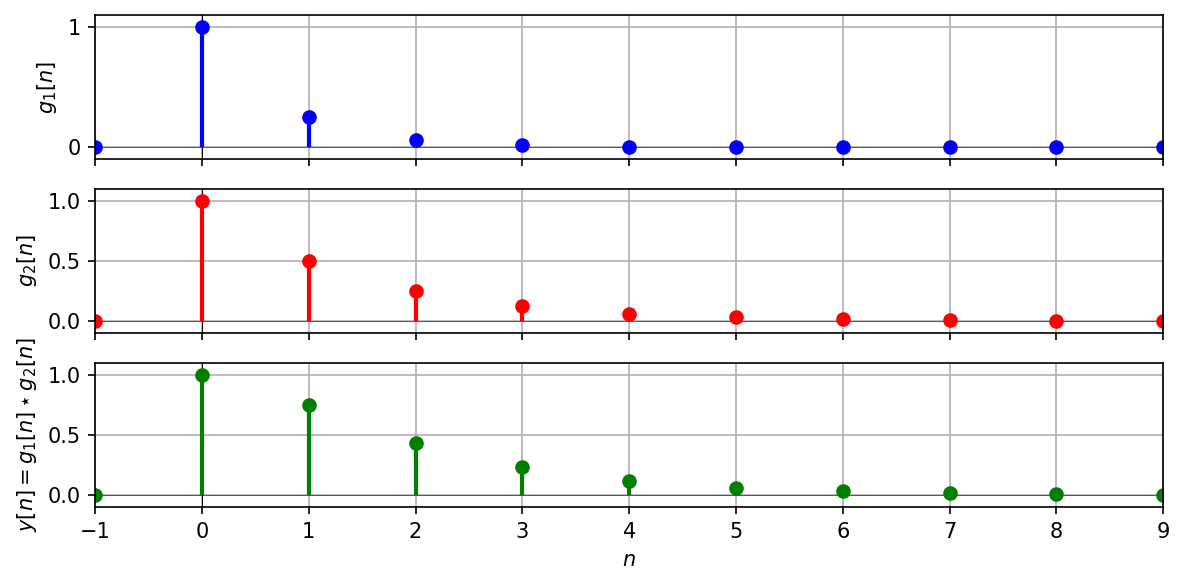

In [9]:
fig = plt.figure(figsize=(8, 4),dpi=150)
ax1 = fig.add_subplot(311)
ax1.plot([k[0]-1, k[-1]+1],[0,0],'k-',lw=0.25)
ax1.plot([0,0],[-2, 2],'k-',lw=0.5)
ax2 = fig.add_subplot(312, sharex=ax1)
ax2.plot([k[0]-1, k[-1]+1],[0,0],'k-',lw=0.25)
ax2.plot([0,0],[-2, 2],'k-',lw=0.5)
ax3 = fig.add_subplot(313, sharex=ax1)
ax3.plot([k[0]-1, k[-1]+1],[0,0],'k-',lw=0.25)
ax3.plot([0,0],[-2, 2],'k-',lw=0.5)

major_ticks = k    
ax1.set_xticks(major_ticks)
ax1.set_yticks(np.arange(0,2))
ax1.grid(True)

markerline, stemlines, baseline = ax1.stem(k, w(k),linefmt='b',markerfmt='bo')
plt.setp(baseline, visible=False)
markerline, stemlines, baseline = ax2.stem(k, g(k),linefmt='r',markerfmt='ro',label='$a = $')
plt.setp(baseline, visible=False)
markerline, stemlines, baseline = ax3.stem(k, y,linefmt='g',markerfmt='go',label='$a = $')
plt.setp(baseline, visible=False)

ax1.set_xlim([k[0], k[-1]])
ax1.set_ylim([-0.1, 1.1])
ax2.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])
ax1.set_ylabel('$g_1[n]$')
ax2.set_ylabel('$g_2[n]$')
ax3.set_ylabel('$y[n]=g_1[n]\star g_2[n]$')
ax3.set_xlabel('$n$')

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
savefig('figs/Topic5_ex8.png',dpi=300)
plt.show()